## SMOTE(Synthetic Minority Oversampling Technique)

In [1]:
from sklearn.datasets import make_classification

In [2]:
make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [4]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

In [5]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

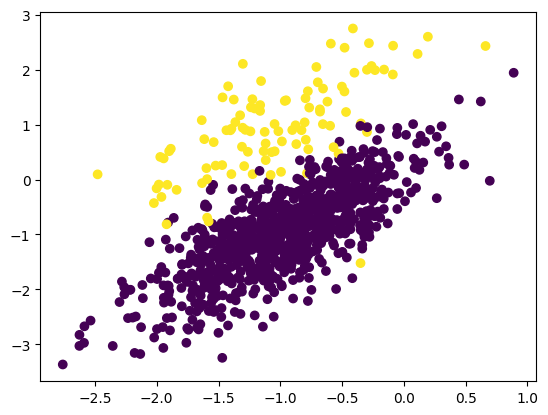

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [8]:
!pip install imblearn

In [11]:
from imblearn.over_sampling import SMOTE


In [12]:
#transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [13]:
X.shape

(1800, 2)

In [14]:
y.shape

(1800,)

In [15]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [16]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [17]:
len(y[y==0])

900

In [18]:
len(y[y==1])

900

In [19]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

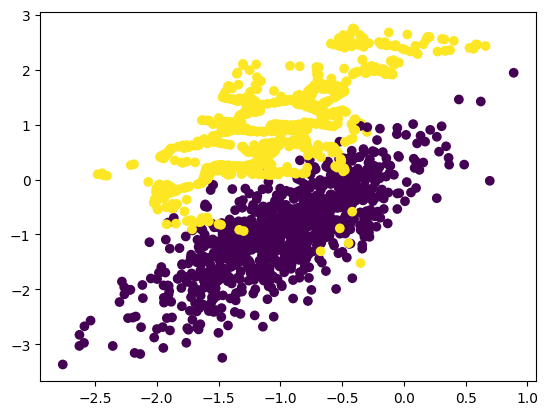

In [20]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])